## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import statistics as sts

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(left = mouse_metadata, right = study_results, how='outer', on= "Mouse ID", left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [2]:
# Checking the number of mice in the DataFrame.
df['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateDF = df[df.duplicated(['Mouse ID', 'Timepoint'])]

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateMouseDF = df.loc[df['Mouse ID'] == 'g989']

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanDF = df[df['Mouse ID'] != 'g989']

In [6]:
# Checking the number of mice in the clean DataFrame.
cleanDF['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# in each summary statistics table there should be a 'title' per se above the column names


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.
infubinol = []
placebo = []
ceftamin = []
stelasyn = []
zoniferol = []
ramicane = []
ketapril = []
propriva = []
naftisol = []
capomulin = []
for i in range(1880):
    if cleanDF.iloc[i-1, 1] == 'Infubinol':
        infubinol.append(cleanDF.iloc[i-1, 6])
    if cleanDF.iloc[i-1, 1] == 'Placebo':
        placebo.append(cleanDF.iloc[i-1, 6])
    if cleanDF.iloc[i-1, 1] == 'Ceftamin':
        ceftamin.append(cleanDF.iloc[i-1, 6])
    if cleanDF.iloc[i-1, 1] == 'Stelasyn':
        stelasyn.append(cleanDF.iloc[i-1, 6])
    if cleanDF.iloc[i-1, 1] == 'Zoniferol':
        zoniferol.append(cleanDF.iloc[i-1, 6])
    if cleanDF.iloc[i-1, 1] == 'Ramicane':
        ramicane.append(cleanDF.iloc[i-1, 6])
    if cleanDF.iloc[i-1, 1] == 'Ketapril':
        ketapril.append(cleanDF.iloc[i-1, 6])
    if cleanDF.iloc[i-1, 1] == 'Propriva':
        propriva.append(cleanDF.iloc[i-1, 6])
    if cleanDF.iloc[i-1, 1] == 'Naftisol':
        naftisol.append(cleanDF.iloc[i-1, 6])
    if cleanDF.iloc[i-1, 1] == 'Capomulin':
        capomulin.append(cleanDF.iloc[i-1, 6])
meanData = []
drugs = [infubinol, placebo, ceftamin, stelasyn, zoniferol, ramicane, ketapril, propriva, naftisol, capomulin]
for i in range(len(drugs)):
        meanData.append(sts.mean(drugs[i-1]))
mean = pd.Series(data = meanData)
medianData = []
for i in range(len(drugs)):
        medianData.append(sts.median(drugs[i-1]))
median = pd.Series(data = medianData)
varianceData = []
for i in range(len(drugs)):
        varianceData.append(sts.variance(drugs[i-1]))
variance = pd.Series(data = varianceData)
stdData = []
for i in range(len(drugs)):
        stdData.append(sts.pstdev(drugs[i-1]))
std = pd.Series(data = stdData)
semData = []
for i in range(len(drugs)):
        semData.append(st.sem(drugs[i-1]))
sem = pd.Series(data = semData)
summaryStatistics = pd.concat([mean, median, variance, std, sem], axis = 1, ignore_index = True)
summaryStatistics.columns = ['Mean', 'Median', 'Variance', 'Std', 'SEM']
index = ['Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol', 'Ramicane', 'Ketapril', 'Propriva', 'Naftisol', 'Capomulin']
summaryStatistics = summaryStatistics.reset_index(drop=True,inplace=False)
summaryStatistics['index'] = index
summaryStatistics = summaryStatistics.set_index(summaryStatistics['index'],inplace=False)
summaryStatistics.index.name = 'Drug Regimen'
summaryStatistics = summaryStatistics.drop(columns = ['index'])
class color:
   BOLD = '\033[1m'
   END = '\033[0m'
print(color.BOLD + '                    Tumor Volume (mm3)' + color.END)
summaryStatistics
# ['Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol',
#        'Ramicane', 'Ketapril', 'Propriva', 'Naftisol', 'Capomulin']

                    Tumor Volume (mm3)


,Mean,Median,Variance,Std,SEM
Drug Regimen,,,,,
Infubinol,40.675741,41.557809,24.947764,4.983904,0.329346
Placebo,52.884795,51.820584,43.128684,6.548770,0.492236
Ceftamin,54.033581,52.288934,61.168083,7.799368,0.581331
Stelasyn,52.591172,51.776157,39.290177,6.250556,0.469821
Zoniferol,54.233149,52.431737,59.450562,7.689090,0.573111
Ramicane,53.236507,51.818479,48.533355,6.947423,0.516398
Ketapril,40.216745,40.673236,23.486704,4.835669,0.320955
Propriva,55.235638,53.698743,68.553577,8.257659,0.603860
Naftisol,52.320930,50.446266,43.852013,6.599675,0.544332


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.
summaryStatisticsData = cleanDF.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([sts.mean, sts.median, sts.variance, sts.pstdev, st.sem])
summaryStatistics = pd.DataFrame(data = summaryStatisticsData)
print(color.BOLD + '                    Tumor Volume (mm3)' + color.END)
summaryStatistics = summaryStatistics.rename(columns = {'mean' : 'Mean', 'median' : 'Median', 'variance' : 'Variance', 'pstdev' : 'Std', 'sem' : 'SEM'})
summaryStatistics

                    Tumor Volume (mm3)


,Mean,Median,Variance,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.983904,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.250556,0.469821
Infubinol,52.884795,51.820584,43.128684,6.548770,0.492236
Ketapril,55.235638,53.698743,68.553577,8.257659,0.603860
Naftisol,54.331565,52.509285,66.173479,8.112811,0.596466
Placebo,54.033581,52.288934,61.168083,7.799368,0.581331
Propriva,52.320930,50.446266,43.852013,6.599675,0.544332
Ramicane,40.216745,40.673236,23.486704,4.835669,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.689090,0.573111


## Bar Plots

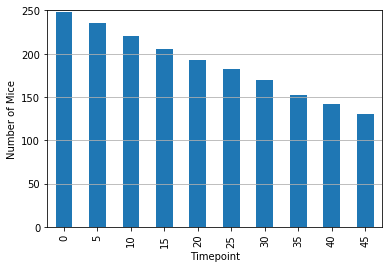

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
micePerTimepoint = cleanDF.set_index(["Timepoint", 'Mouse ID']).count(level="Timepoint")
micePerTimepoint = micePerTimepoint.drop(['Sex', 'Age_months', 'Weight (g)', 'Tumor Volume (mm3)', 'Metastatic Sites'], axis=1)
micePerTimepoint = micePerTimepoint.rename(columns = {'Drug Regimen' : 'Number of Mice'})
barPlot = micePerTimepoint.plot.bar(ylim = [0, 251]);
barPlot.get_legend().remove();
barPlot.set_ylabel("Number of Mice");
barPlot.grid('on', which='major', axis='y')

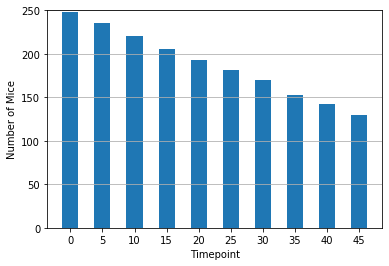

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
micePerTimepoint = micePerTimepoint.reset_index()
x = micePerTimepoint.Timepoint.tolist()
y = micePerTimepoint['Number of Mice'].tolist()
plt.bar(x = x, height = y, width = 2.5)
plt.xlabel('Timepoint')
plt.ylabel('Number of Mice')
plt.xticks(np.arange(0, 50, 5))
plt.grid(axis = 'y')
plt.ylim(ymin = 0, ymax = 250);
plt.show()

## Pie Plots

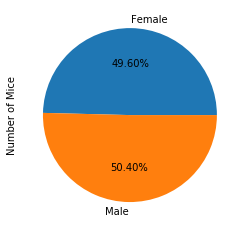

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
noDuplicates = cleanDF.drop_duplicates(subset = 'Mouse ID', keep = 'first')
distributionOfSexes = noDuplicates.set_index(["Sex", 'Mouse ID']).count(level="Sex")
distributionOfSexes = distributionOfSexes.drop(['Timepoint', 'Age_months', 'Weight (g)', 'Tumor Volume (mm3)', 'Metastatic Sites'], axis=1)
distributionOfSexes = distributionOfSexes.rename(columns = {'Drug Regimen' : 'Number of Mice'})
distributionOfSexes.plot(kind = 'pie', subplots = True, autopct='%0.2f%%', legend = False);

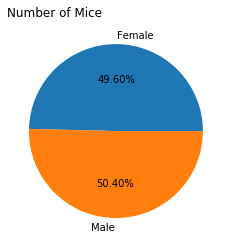

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
data = distributionOfSexes['Number of Mice'].tolist()
plt.pie(data, labels = ['Female', 'Male'], autopct = '%0.2f%%');
plt.title('Number of Mice', loc = 'left');

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
capomulinList = []
capomulinIDs = []
ramicaneList = []
ramicaneIDs = []
infubinolList = []
infubinolIDs = []
ceftaminList = []
ceftaminIDs = []
for i in range(1880):
    if cleanDF.iloc[i, 1] == 'Capomulin':
        if cleanDF.iloc[i, 0] not in capomulinIDs:
            capomulinIDs.append(cleanDF.iloc[i, 0])
            if capomulinIDs:
                if cleanDF.iloc[i, 0] != cleanDF.iloc[i - 1, 0]:
                    capomulinList.append(cleanDF.iloc[i - 1, 6])
    elif cleanDF.iloc[i, 1] == 'Ramicane':
        if cleanDF.iloc[i, 0] not in ramicaneIDs:
            ramicaneIDs.append(cleanDF.iloc[i, 0])
            if ramicaneIDs:
                if cleanDF.iloc[i, 0] != cleanDF.iloc[i - 1, 0]:
                    ramicaneList.append(cleanDF.iloc[i - 1, 6])
    elif cleanDF.iloc[i, 1] == 'Infubinol':
        if cleanDF.iloc[i, 0] not in infubinolIDs:
            infubinolIDs.append(cleanDF.iloc[i, 0])
            if infubinolIDs:
                if cleanDF.iloc[i, 0] != cleanDF.iloc[i - 1, 0]:
                    infubinolList.append(cleanDF.iloc[i - 1, 6])
    elif cleanDF.iloc[i, 1] == 'Ceftamin':
        if cleanDF.iloc[i, 0] not in ceftaminIDs:
            ceftaminIDs.append(cleanDF.iloc[i, 0])
            if ceftaminIDs:
                if cleanDF.iloc[i, 0] != cleanDF.iloc[i - 1, 0]:
                    ceftaminList.append(cleanDF.iloc[i - 1, 6])
capomulinSeries = pd.Series(capomulinList)
ramicaneSeries = pd.Series(ramicaneList)
infubinolSeries = pd.Series(infubinolList)
ceftaminSeries = pd.Series(ceftaminList)
capomulinIQR = st.iqr(x = capomulinList)
ramicaneIQR = st.iqr(x = ramicaneList)
infubinolIQR = st.iqr(x = infubinolList)
ceftaminIQR = st.iqr(x = ceftaminList)
capomulinFirstQuartile = np.percentile(capomulinSeries, 25)
capomulinThirdQuartile = np.percentile(capomulinSeries, 75)
capomulinMax = (capomulinIQR * 1.5) + capomulinThirdQuartile
capomulinMin = -(capomulinIQR * 1.5) + capomulinFirstQuartile
outlier = False
for i in range(len(capomulinList)):
    if capomulinList[i-1] > capomulinMax:
        outlier = True
    elif capomulinList[i-1] < capomulinMin:
        outlier = True
if outlier == True:
    print("There is a suspected outlier within the list of Capomulin final tumor volumes.")
else:
    print("There is no suspected outlier within the list of Capomulin final tumor volumes.")
ramicaneFirstQuartile = np.percentile(ramicaneSeries, 25)
ramicaneThirdQuartile = np.percentile(ramicaneSeries, 75)
ramicaneMax = (ramicaneIQR * 1.5) + ramicaneThirdQuartile
ramicaneMin = -(ramicaneIQR * 1.5) + ramicaneFirstQuartile
outlier = False
for i in range(len(ramicaneList)):
    if ramicaneList[i-1] > ramicaneMax:
        outlier = True
    elif ramicaneList[i-1] < ramicaneMin:
        outlier = True
if outlier == True:
    print("There is a suspected outlier within the list of Ramicane final tumor volumes.")
else:
    print("There is no suspected outlier within the list of Ramicane final tumor volumes.")
infubinolFirstQuartile = np.percentile(infubinolSeries, 25)
infubinolThirdQuartile = np.percentile(infubinolSeries, 75)
infubinolMax = (infubinolIQR * 1.5) + infubinolThirdQuartile
infubinolMin = -(infubinolIQR * 1.5) + infubinolFirstQuartile
outlier = False
for i in range(len(infubinolList)):
    if infubinolList[i-1] > infubinolMax:
        outlier = True
    elif infubinolList[i-1] < infubinolMin:
        outlier = True
if outlier == True:
    print("There is a suspected outlier within the list of Infubinol final tumor volumes.")
else:
    print("There is no suspected outlier within the list of Infubinol final tumor volumes.")
ceftaminFirstQuartile = np.percentile(ceftaminSeries, 25)
ceftaminThirdQuartile = np.percentile(ceftaminSeries, 75)
ceftaminMax = (ceftaminIQR * 1.5) + ceftaminThirdQuartile
ceftaminMin = -(ceftaminIQR * 1.5) + ceftaminFirstQuartile
outlier = False
for i in range(len(ceftaminList)):
    if ceftaminList[i-1] > ceftaminMax:
        outlier = True
    elif ceftaminList[i-1] < ceftaminMin:
        outlier = True
if outlier == True:
    print("There is a suspected outlier within the list of Ceftamin final tumor volumes.")
else:
    print("There is no suspected outlier within the list of Ceftamin final tumor volumes.")

There is no suspected outlier within the list of Capomulin final tumor volumes.
There is no suspected outlier within the list of Ramicane final tumor volumes.
There is no suspected outlier within the list of Infubinol final tumor volumes.
There is no suspected outlier within the list of Ceftamin final tumor volumes.


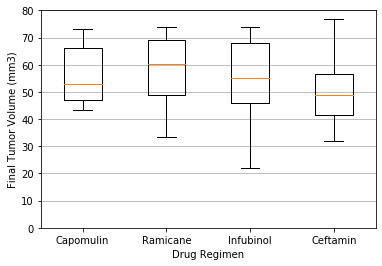

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
green_diamond = dict(markerfacecolor='g', marker='D')
fig, boxplots = plt.subplots()
boxplots.set_xlabel('Drug Regimen')
boxplots.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
boxplots.set_ylabel('Final Tumor Volume (mm3)')
boxplots.set_ylim(ymin = 0, ymax = 80);
boxplots.grid('on', which='major', axis='y')
boxplots.boxplot([capomulinList, ramicaneList, infubinolList, ceftaminList], flierprops=green_diamond);

## Line and Scatter Plots

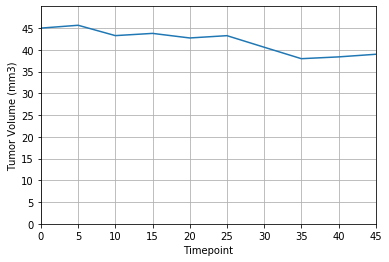

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulinMice = noDuplicates.loc[noDuplicates['Drug Regimen'] == 'Capomulin']
chosenMouse = cleanDF.loc[cleanDF['Mouse ID'] == 'b128']
chosenMouse = chosenMouse.drop(['Mouse ID', 'Age_months', 'Weight (g)', 'Metastatic Sites', 'Sex', 'Drug Regimen'], axis=1)
chosenMouse = chosenMouse.set_index('Timepoint')
linePlot = chosenMouse.plot.line(legend = False, ylim = [0,50], xlim = [0, 45], yticks = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]);
linePlot.set_ylabel("Tumor Volume (mm3)");
linePlot.grid('on', which='major', axis='both')

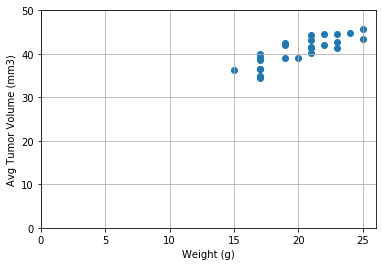

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulinScatter = cleanDF.loc[cleanDF['Drug Regimen'] == 'Capomulin']
capomulinScatter = capomulinScatter.reset_index()
capomulinScatter = capomulinScatter.groupby(by = "Mouse ID").agg('mean')
capomulinScatter = capomulinScatter.drop(['index', 'Age_months', 'Timepoint', 'Metastatic Sites'], axis =1)
capomulinScatter = capomulinScatter.rename(columns = {'Tumor Volume (mm3)' : 'Avg Tumor Volume (mm3)'})
weight = capomulinScatter['Weight (g)'].tolist()
avgVolume = capomulinScatter['Avg Tumor Volume (mm3)'].tolist()
plt.scatter(x = weight, y = avgVolume);
plt.xlabel('Weight (g)');
plt.ylabel('Avg Tumor Volume (mm3)');
plt.ylim(ymin = 0, ymax = 50);
plt.xlim(xmin = 0, xmax = 26);
plt.grid(axis = 'both')

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulinScatter.corr()

,Weight (g),Avg Tumor Volume (mm3)
Weight (g),1.000000,0.841936
Avg Tumor Volume (mm3),0.841936,1.000000


In [19]:
print(f"The linear regression model is {linregress(weight, avgVolume)}.")

The linear regression model is LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134).
